<a href="https://colab.research.google.com/github/varadasantosh/deep-learning-notes/blob/tensorflow/Visualize_Self_%26_Multi_Head_Attention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install `autoawq` this is required for Quantized ModelS

In [ ]:
!pip install autoawq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.6/71.6 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 37.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 116.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 89.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 41.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.4 MB/s eta 0:00:

# Download Llama Model weights from Hugging Face

In [ ]:

from transformers import AutoTokenizer, AutoModel, AutoModelForCausalLM
import torch

model_name= "meta-llama/Llama-3.2-3B-Instruct"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name, output_attentions=True)

tokenizer_config.json:   0%|          | 0.00/54.5k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/296 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/878 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/20.9k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/1.46G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
print(model)

LlamaModel(
  (embed_tokens): Embedding(128256, 3072)
  (layers): ModuleList(
    (0-27): 28 x LlamaDecoderLayer(
      (self_attn): LlamaAttention(
        (q_proj): Linear(in_features=3072, out_features=3072, bias=False)
        (k_proj): Linear(in_features=3072, out_features=1024, bias=False)
        (v_proj): Linear(in_features=3072, out_features=1024, bias=False)
        (o_proj): Linear(in_features=3072, out_features=3072, bias=False)
      )
      (mlp): LlamaMLP(
        (gate_proj): Linear(in_features=3072, out_features=8192, bias=False)
        (up_proj): Linear(in_features=3072, out_features=8192, bias=False)
        (down_proj): Linear(in_features=8192, out_features=3072, bias=False)
        (act_fn): SiLU()
      )
      (input_layernorm): LlamaRMSNorm((3072,), eps=1e-05)
      (post_attention_layernorm): LlamaRMSNorm((3072,), eps=1e-05)
    )
  )
  (norm): LlamaRMSNorm((3072,), eps=1e-05)
  (rotary_emb): LlamaRotaryEmbedding()
)


In [ ]:
# Determine the Device according to accelerator

In [11]:
device = 'cuda' if torch.cuda.is_available() else "cpu"

# Process the model for the give Input Sequence

In [13]:

import torch

# Choose a sentence with a repeated token.
# For example, the word "bank" appears twice with different contexts.
text = "the financial bank is located on river bank"


# Tokenize the text
inputs = tokenizer(text, return_tensors="pt").to(device)
token_ids = inputs.input_ids[0]
tokens = tokenizer.convert_ids_to_tokens(token_ids)

model = model.to(device)
# Get model outputs.
with torch.no_grad():
    inputs = inputs.to(device)
    outputs = model(**inputs)


# Get Attention From Outputs

In [14]:
attention_matrix = outputs.attentions

In [ ]:
len(attention_matrix)

28

# Shape of Attention matrix of the Last Layer, all the attention layers are of same size  (1,24,9,9) => (batch_size, num_heads, sequence_length, sequence_length)

In [16]:
attention_matrix[27].shape

torch.Size([1, 24, 9, 9])

# Calculate & Visualize Average attention across all Heads (Llama Model has 24 Heads)

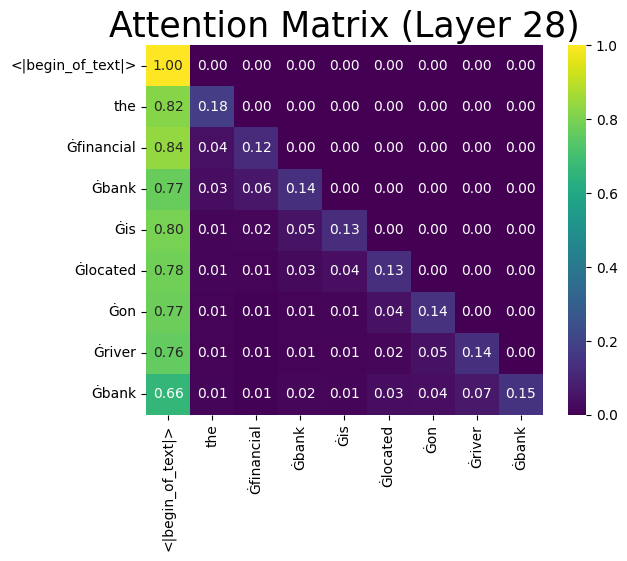

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
avg_attn =attention_matrix[27][0].mean(dim=0)
sns.heatmap(avg_attn.cpu(), cmap="viridis",annot=True,fmt=".2f",xticklabels=tokens,yticklabels=tokens )
plt.title(f"Attention Matrix (Layer 28)",fontdict={'fontsize':25})
plt.show()

# Calculate & Visualize Attention for each Head

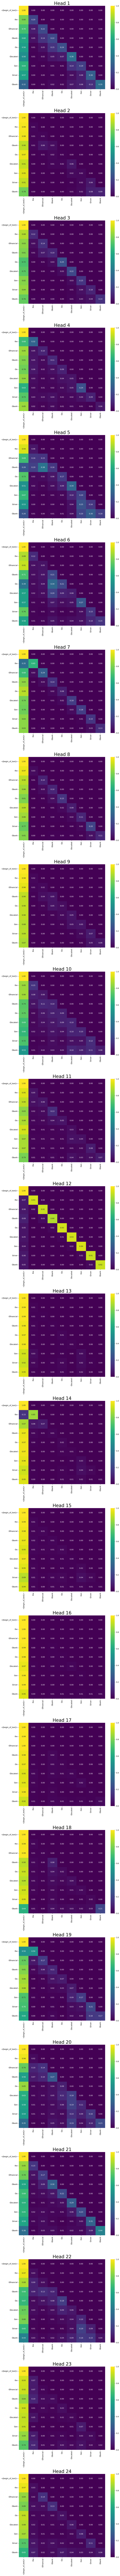

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(24, 1, figsize=(10, 200))
for i, ax in enumerate(axes.flat):
    sns.heatmap(attention_matrix[27][0][i].cpu(), ax=ax, cmap="viridis",annot=True,fmt=".2f",xticklabels=tokenizer.convert_ids_to_tokens(inputs["input_ids"][0]),yticklabels=tokenizer.convert_ids_to_tokens(inputs["input_ids"][0]) )
    ax.set_title(f"Head {i+1}",fontdict={'fontsize':25})
plt.tight_layout()
plt.show()